## task1

In [ ]:
import pandas as pd

# Load the provided files into dataframes

agency_quality_path = r'E:\IS_733\Project\Agency for Healthcare Research and Quality.csv.xlsx'
hospital_data_path = r'E:\IS_733\Project\Hospital_Data.csv.xlsx'
spending_data_path = r'E:\IS_733\Project\Medicare Spending Per Patient.csv.xlsx'

hospital_data = pd.read_excel(hospital_data_path)
spending_data = pd.read_excel(spending_data_path)

# Display the first few rows of each dataframe to understand their structure
hospital_data.head(), spending_data.head()


In [5]:
# Merge the two datasets on 'Provider Number' (hospital_data) and 'Provider ID' (spending_data)
merged_data = pd.merge(
    hospital_data,
    spending_data,
    left_on="Provider Number",
    right_on="Provider ID",
    how="inner"
)

# Display the first few rows of the merged dataset
merged_data.head()


,Provider Number,Hospital Name_x,Address 1_x,Address 2_x,Address 3_x,City_x,State_x,ZIP Code_x,County,Phone Number_x,...,Address 2_y,Address 3_y,City_y,State_y,ZIP Code_y,County Name,Phone Number_y,Measure,Spending per Hospital Patient with Medicare,Footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,Spending per Hospital Patient with Medicare,1,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,Spending per Hospital Patient with Medicare,1,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,Spending per Hospital Patient with Medicare,1,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,Spending per Hospital Patient with Medicare,1,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,Spending per Hospital Patient with Medicare,0.99,NaN


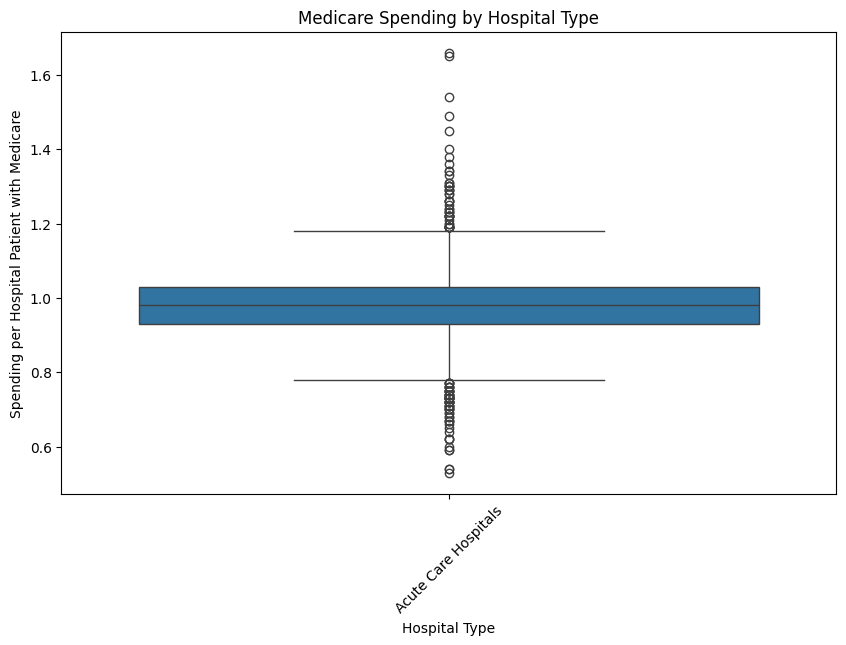

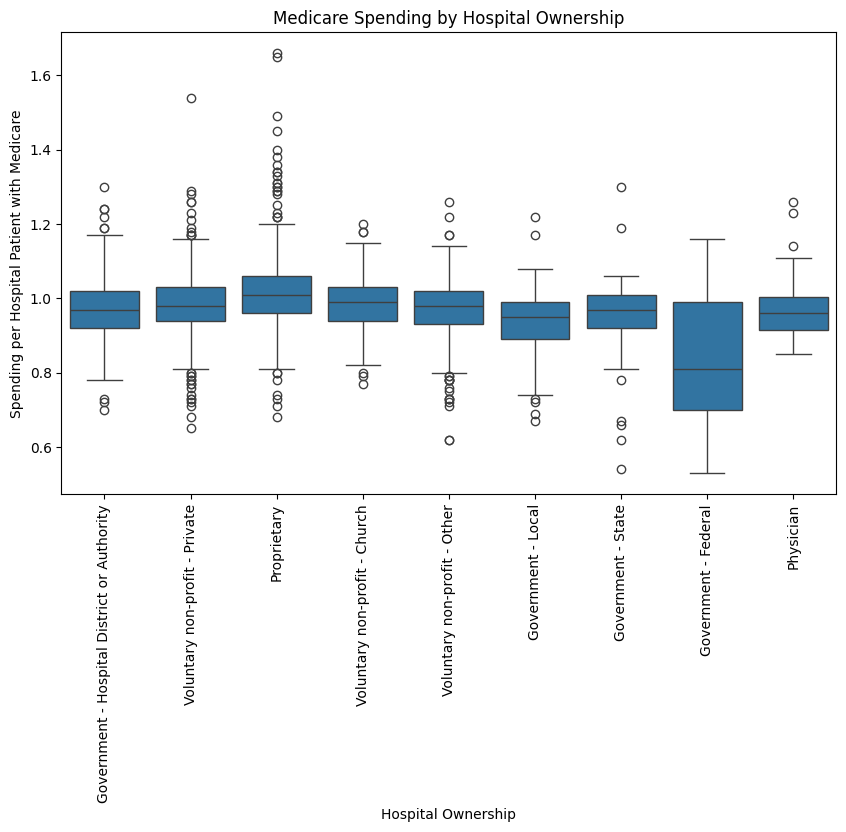

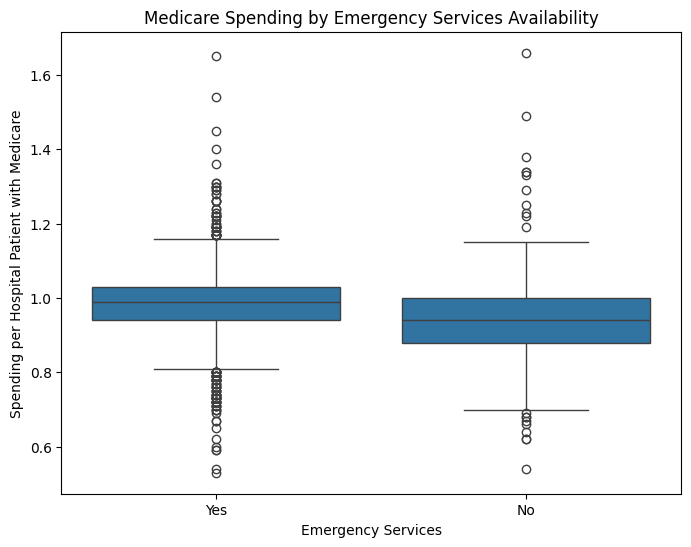

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and prepare data for analysis
merged_data['Spending per Hospital Patient with Medicare'] = pd.to_numeric(
    merged_data['Spending per Hospital Patient with Medicare'], errors='coerce'
)

# Select relevant columns for analysis
analysis_data = merged_data[
    [
        "Spending per Hospital Patient with Medicare",
        "Hospital Type",
        "Hospital Ownership",
        "Emergency Services",
        "County",
        "State_x",
    ]
].dropna()

# Visualize Spending by Hospital Type
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Hospital Type",
    y="Spending per Hospital Patient with Medicare",
    data=analysis_data,
)
plt.title("Medicare Spending by Hospital Type")
plt.xticks(rotation=45)
plt.show()

# Visualize Spending by Hospital Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Hospital Ownership",
    y="Spending per Hospital Patient with Medicare",
    data=analysis_data,
)
plt.title("Medicare Spending by Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

# Visualize Spending by Emergency Services availability
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Emergency Services",
    y="Spending per Hospital Patient with Medicare",
    data=analysis_data,
)
plt.title("Medicare Spending by Emergency Services Availability")
plt.show()


## Task4

In [30]:
# Load the newly provided datasets
quality_data = r'E:\IS_733\Project\Agency for Healthcare Research and Quality.csv.xlsx'
#hospital_data_path = r'E:\IS_733\Project\Hospital_Data.csv.xlsx'
spending_data = r'E:\IS_733\Project\Medicare Spending Per Patient.csv.xlsx'

quality_data = pd.read_excel(quality_data)
spending_data = pd.read_excel(spending_data)

# Display the first few rows of each dataset to understand their structure
quality_data.head(), spending_data.head()


(   Provider Number                     Hospital Name  \
 0            10001  SOUTHEAST ALABAMA MEDICAL CENTER   
 1            10005     MARSHALL MEDICAL CENTER SOUTH   
 2            10006    ELIZA COFFEE MEMORIAL HOSPITAL   
 3            10007          MIZELL MEMORIAL HOSPITAL   
 4            10008       CRENSHAW COMMUNITY HOSPITAL   
 
                     Address 1  Address 2  Address 3      City State  ZIP Code  \
 0      1108 ROSS CLARK CIRCLE        NaN        NaN    DOTHAN    AL     36301   
 1  2505 U S HIGHWAY 431 NORTH        NaN        NaN      BOAZ    AL     35957   
 2          205 MARENGO STREET        NaN        NaN  FLORENCE    AL     35631   
 3               702 N MAIN ST        NaN        NaN       OPP    AL     36467   
 4         101 HOSPITAL CIRCLE        NaN        NaN   LUVERNE    AL     36049   
 
   County Name  Phone Number  ...  \
 0     HOUSTON    3347938701  ...   
 1    MARSHALL    2565938310  ...   
 2  LAUDERDALE    2567688400  ...   
 3   COVINGTON

In [32]:
# Merge the datasets on the relevant columns
merged_quality_spending = pd.merge(
    quality_data,
    spending_data,
    left_on="Provider Number",
    right_on="Provider ID",
    how="inner"
)

# Select relevant columns for analysis
analysis_data = merged_quality_spending[
    [
        "Spending per Hospital Patient with Medicare",
        "Rate - Serious Complications",
        "Lower Estimate - Serious Complications",
        "Higher Estimate - Serious Complications",
    ]
]

# Convert spending to numeric for analysis
analysis_data["Spending per Hospital Patient with Medicare"] = pd.to_numeric(
    analysis_data["Spending per Hospital Patient with Medicare"], errors="coerce"
)

# Drop rows with missing data
analysis_data_cleaned = analysis_data.dropna()

# Display the first few rows of cleaned data
analysis_data_cleaned.head()


C:\Users\gyala\AppData\Local\Temp\ipykernel_5968\2983944413.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data["Spending per Hospital Patient with Medicare"] = pd.to_numeric(


,Spending per Hospital Patient with Medicare,Rate - Serious Complications,Lower Estimate - Serious Complications,Higher Estimate - Serious Complications
0,1.00,0.68,0.52,0.84
1,1.00,0.48,0.16,0.79
2,1.00,0.8,0.59,1.02
3,1.00,0.64,0.23,1.05
4,0.99,0.57,0.1,1.04


C:\Users\gyala\AppData\Local\Temp\ipykernel_5968\1773332401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data_cleaned[col] = pd.to_numeric(analysis_data_cleaned[col], errors="coerce")


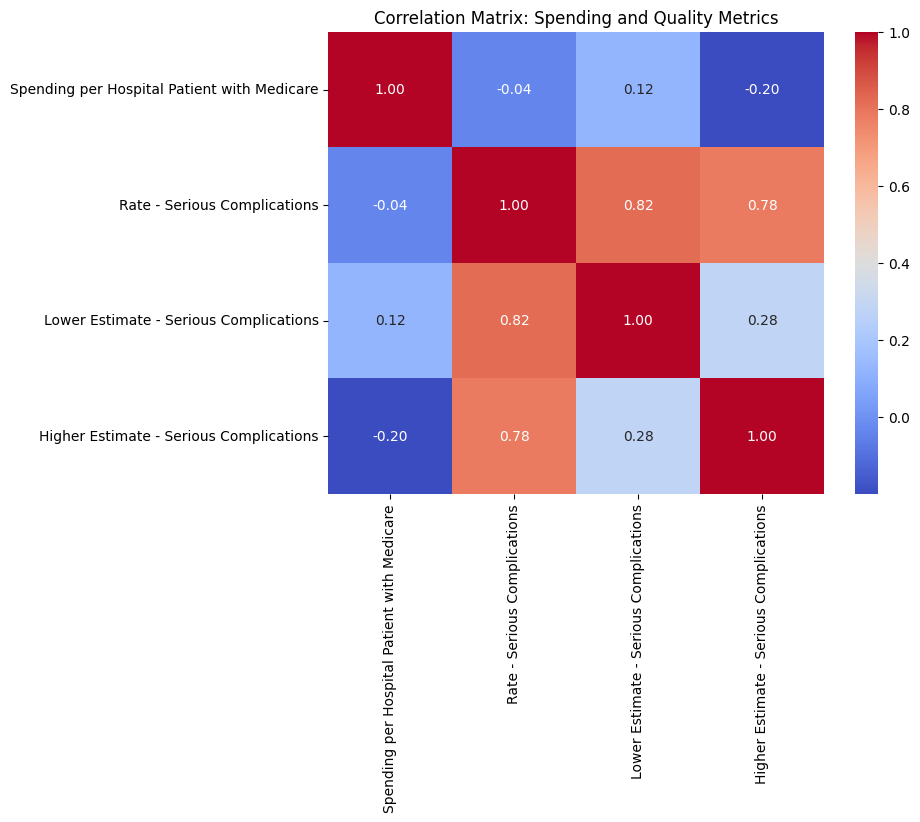

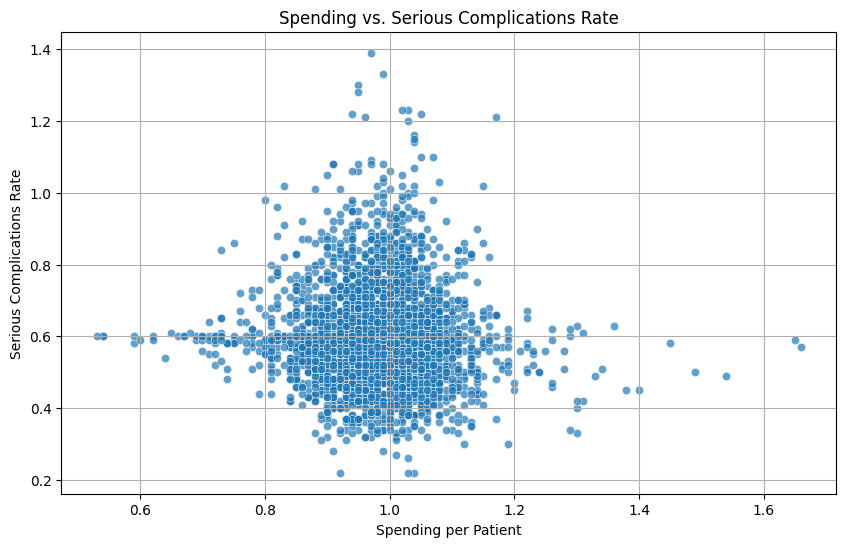

In [36]:
# Convert all relevant columns to numeric, coercing errors to NaN
columns_to_convert = [
    "Spending per Hospital Patient with Medicare",
    "Rate - Serious Complications",
    "Lower Estimate - Serious Complications",
    "Higher Estimate - Serious Complications",
]

for col in columns_to_convert:
    analysis_data_cleaned[col] = pd.to_numeric(analysis_data_cleaned[col], errors="coerce")

# Drop rows with any remaining NaN values in the relevant columns
analysis_data_cleaned = analysis_data_cleaned.dropna(subset=columns_to_convert)

# Retry the correlation analysis
correlation_matrix_cleaned = analysis_data_cleaned.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Spending and Quality Metrics")
plt.show()

# Retry the scatter plot: Spending vs. Serious Complications Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Spending per Hospital Patient with Medicare",
    y="Rate - Serious Complications",
    data=analysis_data_cleaned,
    alpha=0.7
)
plt.title("Spending vs. Serious Complications Rate")
plt.xlabel("Spending per Patient")
plt.ylabel("Serious Complications Rate")
plt.grid(True)
plt.show()
